# 高斯高频滤波

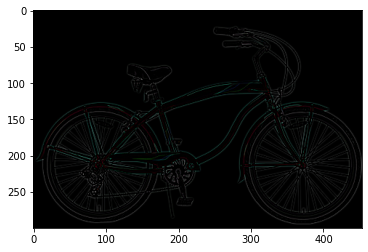

In [152]:
import cv2
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import PIL

img = plt.imread('./data/bicycle.bmp')
gauss = cv2.GaussianBlur(img,(5,5),0)  #(3,3)为高斯半径
gauss = cv2.subtract(img , gauss )  #得到残差高频图

plt.imshow(gauss)
plt.show()

# 高斯低频滤波

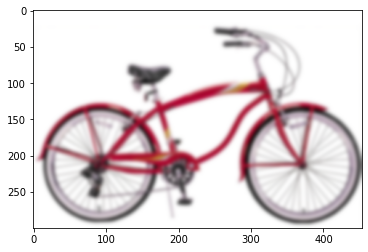

In [157]:
import cv2
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import PIL

img = plt.imread('./data/bicycle.bmp')
gauss = cv2.GaussianBlur(img,(15,15),0)  #(3,3)为高斯半径

plt.imshow(gauss)
plt.show()

# 高斯 高低 滤波 （opencv版本）时域卷积

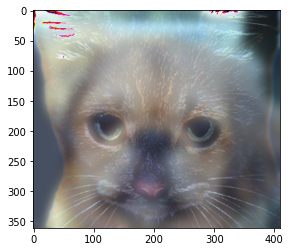

In [143]:
import cv2
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import PIL

img = plt.imread('./data/cat.bmp')
# 高斯波
gaussain1 = cv2.GaussianBlur(img,(55,55),0,0)  #(3,3)为高斯半径
gaussain1 = cv2.subtract(img , gaussain1 )  #得到残差高频图

img = plt.imread("./data/dog.bmp")
# 高斯滤波
gaussain2 = cv2.GaussianBlur(img,(45,45),0,0)  #(3,3)为高斯半径

# 图像叠加
plt.imshow(gaussain1 + gaussain2)
plt.show()

# 高斯 高低 滤波 （手写版本）频域卷积

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


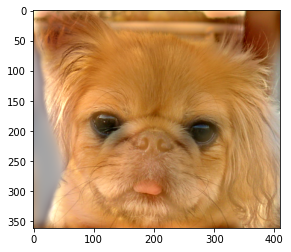

In [33]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import math
import torch
import matplotlib.pyplot as plt

# generate a gussian matrix
def makeGaussianFilter(H, W, sigma):
    centerI = int(H/2) + 1 if H % 2 == 1 else int(H/2)
    centerJ = int(W/2) + 1 if W % 2 == 1 else int(W/2)
    
    # 2-dimension gaussian formula
    def gaussian(i,j):
        res = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
        return res

    return np.array([[gaussian(i,j) for j in range(W)] for i in range(H)],dtype=np.float)


def doGaussianFilter(imageMatrix, filterMatrix):
    shiftedDFT = fftshift(fft2(imageMatrix))
    filteredDFT = shiftedDFT * filterMatrix
    return ifft2(ifftshift(filteredDFT)) 


def hybridImage(highFreqImg, lowFreqImg, sigma):
    H, W, dim = highFreqImg.shape
    image_3d = np.zeros([H, W, dim],dtype=np.complex64)
    # 遍历每一维 RGB
    for i in range(dim):
        gauss_kernal = makeGaussianFilter(H, W, sigma)
        highPassed = doGaussianFilter(highFreqImg[:, :, i], np.ones(gauss_kernal.shape) - gauss_kernal)
        lowPassed = doGaussianFilter(lowFreqImg[:, :, i], gauss_kernal)
        # 高通 + 低通 混合
        image_3d[:, :, i] = highPassed + lowPassed
    return image_3d


if __name__ == "__main__":
    img1 = plt.imread("./data/dog.bmp") / 255.0
    img2 = plt.imread("./data/cat.bmp") / 255.0
    # 图像混合
    hybrid = hybridImage(img1, img2, 6)
    hybrid = np.array(np.real(hybrid))
    # 图像显示
    plt.imshow(hybrid)   
    plt.show()